In [1]:
from scripts import Diatom

In [2]:
diatom = Diatom("iLB1027_lipid.xml", "DM")

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2760359
Academic license 2760359 - for non-commercial use only - registered to ma___@ug.uchile.cl


'R_AAL(fum)_c' is not a valid SBML 'SId'.
'R_sink_Asn-X-Ser_Thr_c' is not a valid SBML 'SId'.


In [3]:
def polytope_pipeline(reactions: tuple[str, str], n_angles: int = 360, delta: float = 0.01, n_clusters: int = 30):
    diatom.set_objective_functions({reactions[1]: 1.0})
    diatom.analyze.project_polytope_2d(reactions, n_angles = n_angles)
    diatom.grid.sample_polytope(delta = delta)
    diatom.grid.debug_plot(delta = delta)
    diatom.analyze.qualitative_analysis(only_load=False)
    diatom.clustering.set_grid_clusters('hierarchical', k = n_clusters)
    #df = diatom.clustering.get_grid_cluster_qual_profiles(threshold=0.8, changing= True)
    #diatom.clustering.compare_clusters(df, reactions[0], reactions[1]).head(200)
    diatom.plot.plot_sampled_polytope(show_boundary=True)


def analyze_reactions(reaction_list1: list[str], reaction_list2: list[str], n_angles: int = 360, delta: float = 0.0125) -> None:
    for reaction1 in reaction_list1:
        for reaction2 in reaction_list2:
            polytope_pipeline((reaction1, reaction2), n_angles = n_angles, delta = delta)


Maximize
1.0*DM_biomass_c - 1.0*DM_biomass_c_reverse_c49c1


/home/matiasolate/miniconda3/envs/diatom/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


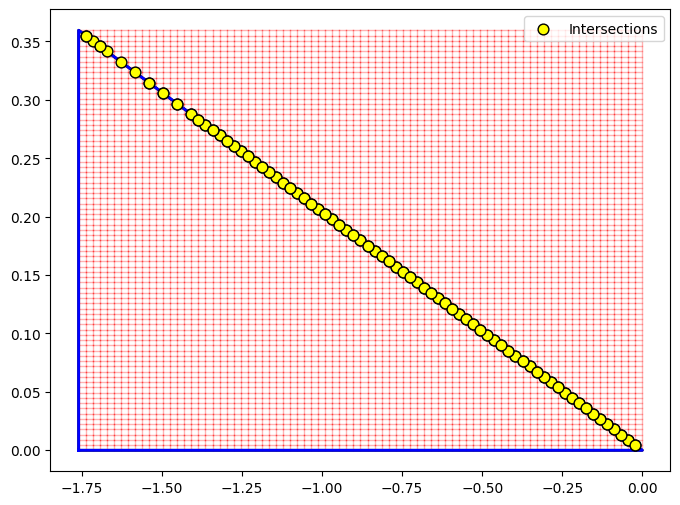

Running qualitative fva over grid feasible points...
No reactions previously selected for FVA and clustering!
Setting reactions for analysis...

Analyzing point feasibility....


100%|██████████| 3460/3460 [00:12<00:00, 285.01it/s]


Done!

base: (3460, 424) -> one-hot: (3460, 880)
Clustering grid points ...
Done! n_clusters: 6


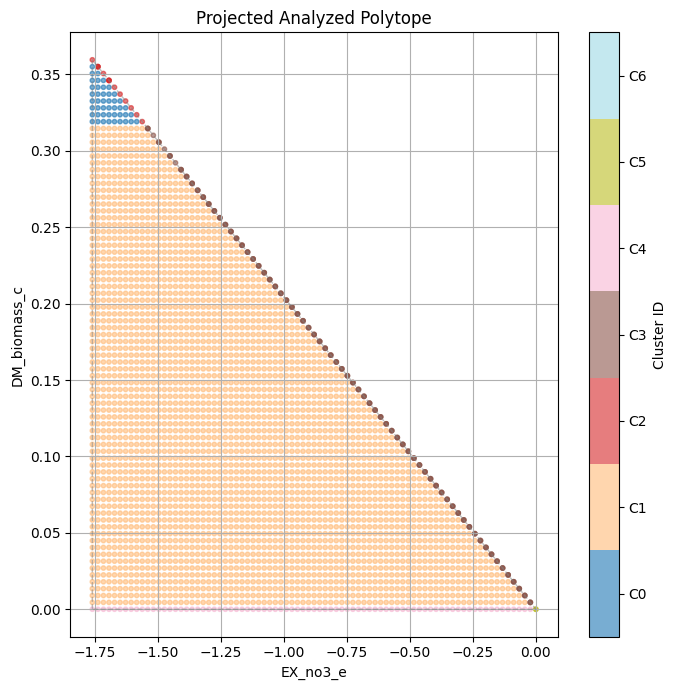

In [4]:
reactions1 = ["EX_no3_e"]
reactions2 = ["DM_biomass_c"]

analyze_reactions(reactions1, reactions2)


In [ ]:
reactions = [
    "RUBISC_h", 
    "EX_co2_e",
    "EX_o2_e",
    "EX_h2o_e", 
    "NITR_c",
    "EX_co_e",
]

df = diatom.clustering.get_grid_cluster_qual_profiles(threshold=0.8, changing=True)
df.loc[reactions]

cluster_dfs len: 6


KeyError: "['EX_h2_e'] not in index"

In [ ]:
diatom.clustering.compare_clusters(df, "c1", "c3").head(200)

,c1,c3
5DOAN_c,0+,0
ADCL_c,0+,0
ADCS_c,0+,0
AIAL_c,++,+
AIRt_h,0+,0
AMETt_h,++,+
AMPMS_h,0+,0
ANPRT_c,++,+
ANTHt_h,--,-
CHRL_h,++,+
